### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

***
### Importing Data

In [2]:
df = pd.read_csv("train.csv")
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
# looking for null values
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [4]:
# checking if ID column is a completely unique column
df.id.nunique()

159571

__Observation:__ 🔎
- There are no null values in the dataset
- The ID column is completely unique, adding it to the machine learning model will reduce the accuracy

In [5]:
# dropping "id" column
df = df.drop("id",axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [7]:
# fetching the number of unique values all the columns 
print ("Number of unique values")
for cols in df: print(f"{cols:17}:{df[cols].nunique()}")

Number of unique values
comment_text     :159571
malignant        :2
highly_malignant :2
rude             :2
threat           :2
abuse            :2
loathe           :2


__Observation:__ 🔎
- There are no other values such as hyphens or blank spaces in the columns because there are only 2 unique values in the rest of the columns

In [8]:
# looking at the statistical summary of the dataset
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# creating a column that checks for highly malicious comments
df['extreme'] = np.where((df['malignant'] & df['highly_malignant'] == 1) | 
                                 (df['malignant'] & df['rude'] == 1) | 
                                 (df['malignant'] & df['threat'] == 1) | 
                                 (df['malignant'] & df['abuse'] == 1) | 
                                 (df['malignant'] & df['loathe'] == 1) | 
                                 (df['highly_malignant'] & df['rude'] == 1) | 
                                 (df['highly_malignant'] & df['threat'] == 1) | 
                                 (df['highly_malignant'] & df['abuse'] == 1) | 
                                 (df['highly_malignant'] & df['loathe'] == 1) | 
                                 (df['rude'] & df['threat'] == 1) | 
                                 (df['rude'] & df['abuse'] == 1) | 
                                 (df['rude'] & df['loathe'] == 1) | 
                                 (df['threat'] & df['loathe'] == 1) | 
                                 (df['threat'] & df['abuse'] == 1) | 
                                 (df['abuse'] & df['loathe'] == 1), 1, 0)
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,extreme
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0


In [10]:
df.extreme.value_counts()

0    149706
1      9865
Name: extreme, dtype: int64

In [11]:
df[df['extreme']==1]

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,extreme
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
42,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,1
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,1
51,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0,1
55,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...
159494,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1,1
159514,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0,1
159541,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0,1
159546,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0,1


__Observation:__ 🔎
- There are 9865 comments that match more than 1 criteria of a malicious comment.

In [12]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [13]:
df['comment_text'][2536]

'"Tmbox\n  | type  = style\n  | image = \n  | text  = \nPlease come to IRC.  \'\'\'By the looks of your question, I think it would be best to have you log on to IRC. IRC stands for ""Internet Relay Chat"", which allows for real-time text-based communication with other users. This way, in addition to the help I can provide, I can get others on #wikipedia-en-help to help you, as well. Here is a web based IRC client, so you don\'t have to download anything to talk to us! See you there!\n"'

In [14]:
df.comment_text[42]

"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!"

In [15]:
df.comment_text[10000]

"Hi RedRose and apologies for delay. Here is a draft of what I propose to present on the 'new section' pages.\nThe 6 volumes of Ultimate Allocations cover the 'reported' allocations of all British Railways: Steam  Diesel & Electric Locomotives on BR stock from 1950 - 1968 with additional information from 1948 where available. They are formatted in A4 comb bound volumes for ease of use. There are 3 main columns which are sub-divided with individual locomotive details including date when 'new' if appropriate. All 'reported' and published allocations and re-allocations combined with withdrawal dates where known are listed on either 'Weekly' - 'Monthly' - or 'Period Ending' dependant on regional variations at that time. A link to several testimonials and scanned images type of information provided can be found at www.ultimate-allocations.co.uk\nPlease advise if this information would be acceptable for presentation in the 'new section' you previously advised. I look forward to seeing your r

In [16]:
# cleaning the comments

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_comment_text(df, df_column_name):
  # Convert all messages to lower case
  df[df_column_name] = df[df_column_name].str.lower()

  # Replace email addresses with 'email'
  df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                  'email')

  # Replace URLs with 'webaddress'
  df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                    'website')
                                    
  # Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
  df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'currency')
      
  # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
  df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                    'phonenumber')

  # Replace numbers with 'numbr'
  df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'number')

  # Remove punctuation
  df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

  # Replace whitespace between terms with a single space
  df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

  # Remove leading and trailing whitespace
  df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')

  # Removes words of length 2 
  df[df_column_name] = df[df_column_name].str.replace(r'\b\w{1,2}\b', '')

  # Remove stopwords
  stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', 'im', 'dont', 'doin', 'ure'])
  df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ibbu2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
clean_comment_text(df,"comment_text")

In [18]:
df.comment_text[39000]

'ryukyu islands ryūkyū shotō noticed recent activity nansei islands suspect understand english language ryukyu islands identical japanese ryūkyū shotō lengthy discussion talk ryukyu islands please read'

***
### Data Visualization

In [19]:
counts = []
categories = list(df.drop('comment_text',axis=1).columns.values)
for i in categories: counts.append((i, df.drop('comment_text',axis=1)[i].sum()))
df_stats = pd.DataFrame(counts, columns=['Category', 'Count'])
df_stats

,Category,Count
0,malignant,15294
1,highly_malignant,1595
2,rude,8449
3,threat,478
4,abuse,7877
5,loathe,1405
6,extreme,9865


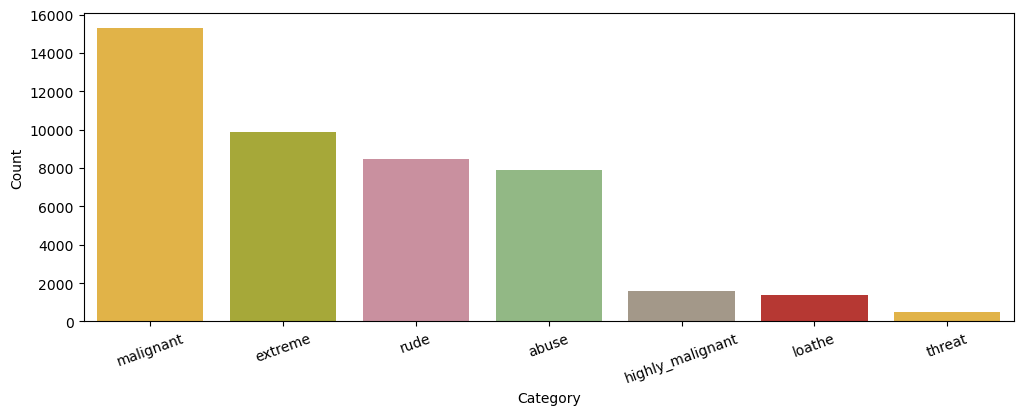

In [20]:
plt.figure(figsize=(12,4))
sns.barplot(x='Category', y='Count', data=df_stats.sort_values(by='Count',ascending=False), 
palette=('#fabd2f','#b8bb26','#d3869b','#8ec07c','#a89984','#cc241d'))
plt.xticks(rotation=20)
plt.show()

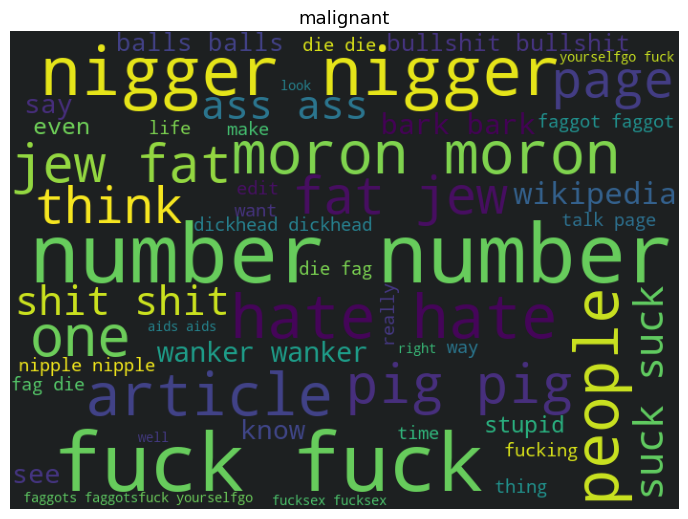

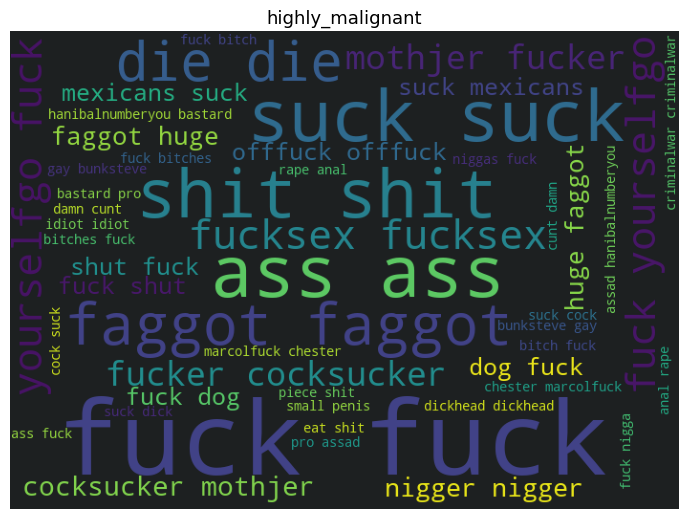

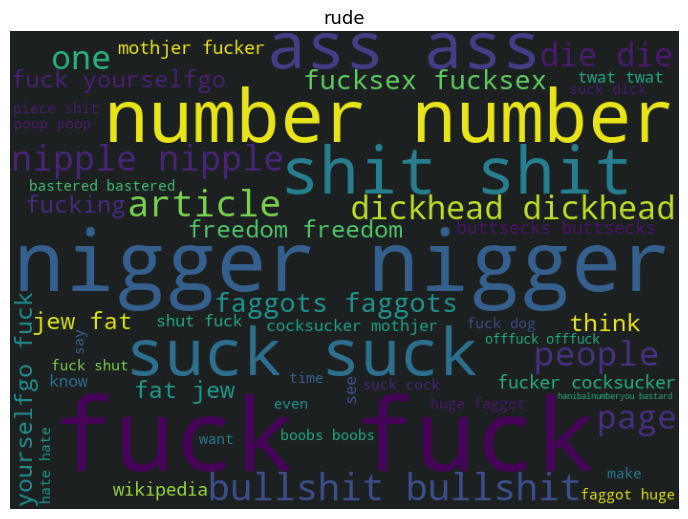

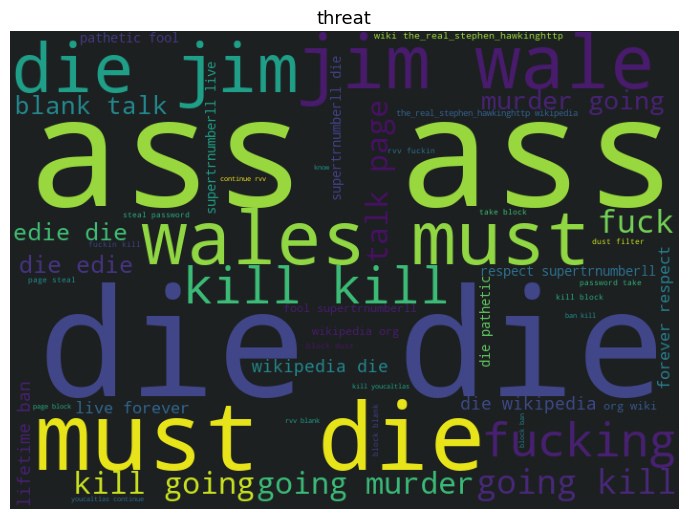

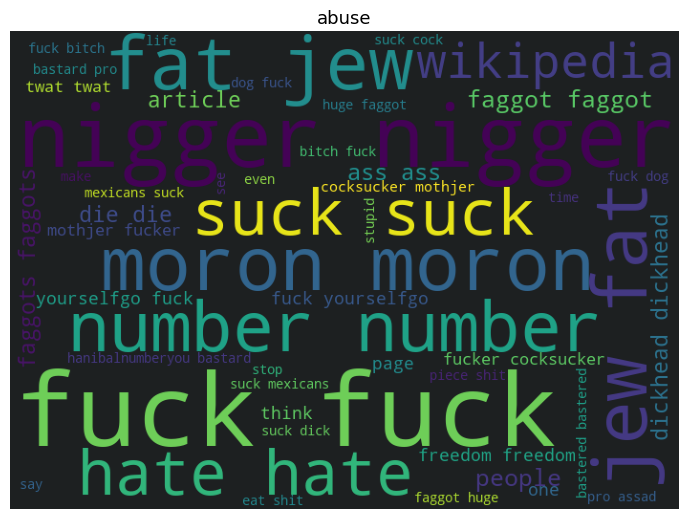

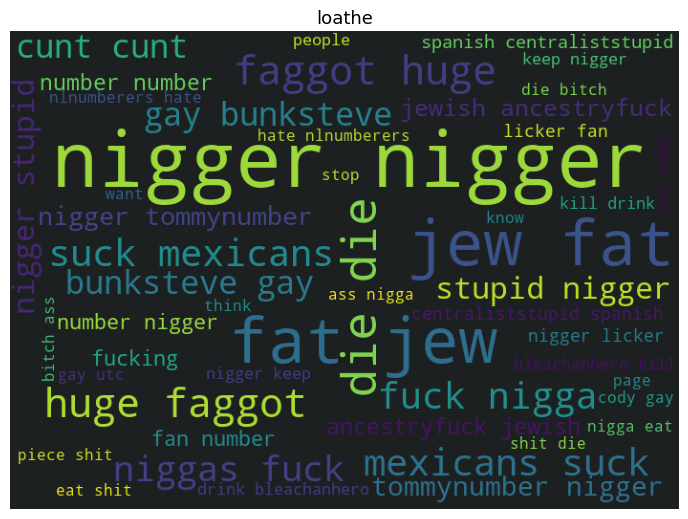

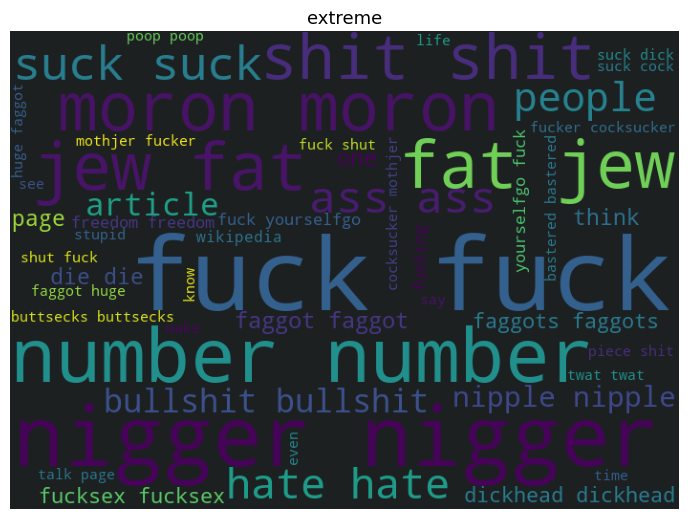

In [22]:
# print the wordcloud for each column
from wordcloud import WordCloud

collist = df.columns.values[1:]
nrows = 7
ncols = 1


for i in range(0,len(collist)):
    col_wordcloud = df['comment_text'][df[collist[i]]==1]
    # plt.subplot(nrows,ncols,i+1)
    word_cloud = WordCloud(width=700,height=500,background_color='#1d2021',max_words=50).generate(' '.join(col_wordcloud))
    plt.figure(figsize=(10,5))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.title(collist[i],fontsize=13)
    plt.tight_layout(pad=0)
    plt.show()

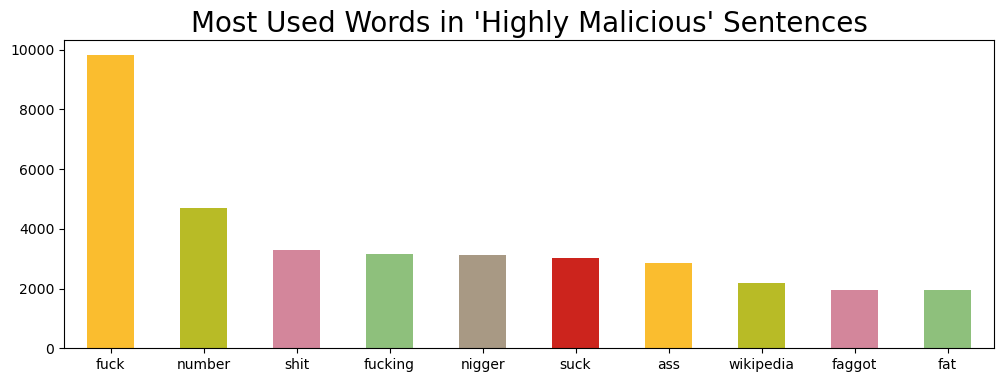

In [23]:
from collections import Counter
# to plot most used malicious-words in the dataset
words_mostused = pd.Series(' '.join(df['comment_text'][df['extreme']==1]).lower().split()).value_counts()[:10]
words_mostused_plot = words_mostused.plot(kind='bar',figsize=(12,4),
color=['#fabd2f','#b8bb26','#d3869b','#8ec07c','#a89984','#cc241d'])
plt.title("Most Used Words in 'Highly Malicious' Sentences",fontsize=20)
plt.xticks(rotation=0)
plt.show()

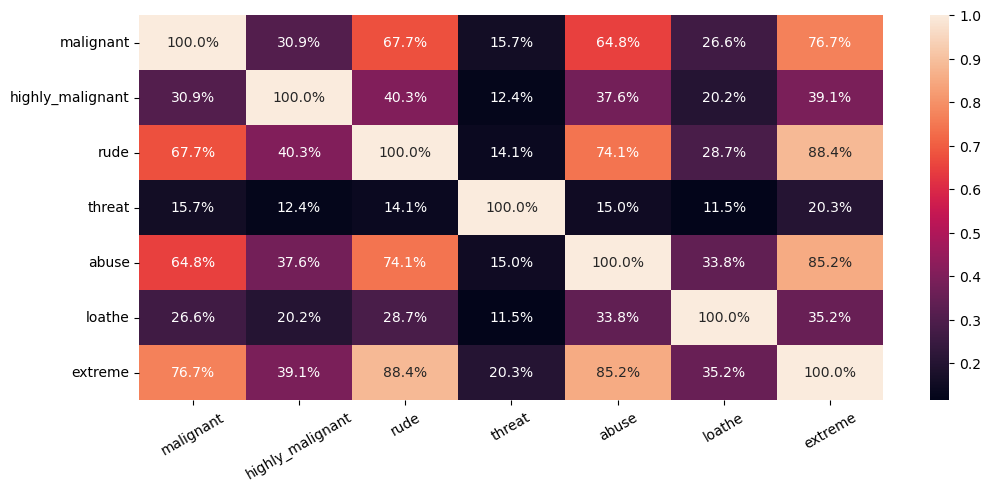

In [24]:
# checking the correlation of the dataset
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True, fmt='.1%')
plt.xticks(rotation=30)
plt.show()

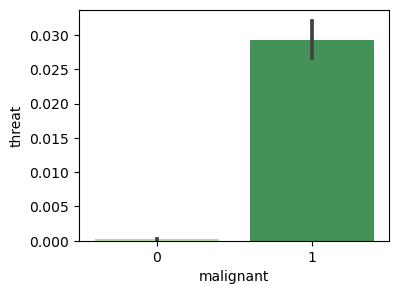

In [79]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['malignant'],y=df['threat'],palette='YlGn')
plt.show()

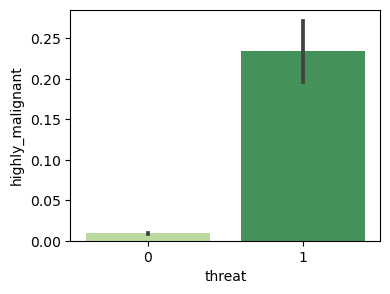

In [80]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['threat'],y=df['highly_malignant'],palette='YlGn')
plt.show()

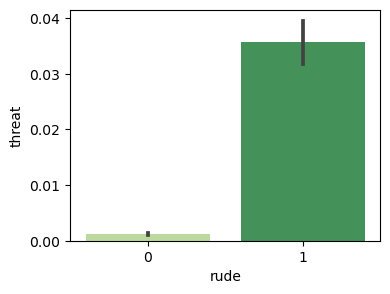

In [81]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['rude'],y=df['threat'],palette='YlGn')
plt.show()

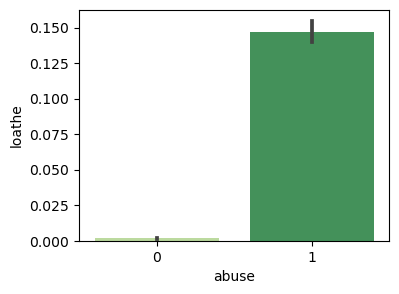

In [82]:
plt.figure(figsize=(4,3))
sns.barplot(x=df['abuse'],y=df['loathe'],palette='YlGn')
plt.show()

***
### Building Model

In [25]:
df.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'extreme'],
      dtype='object')

In [26]:
# seperating into x and y
x = df.drop(['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe', 'extreme'],axis=1)
y = df.drop('comment_text',axis=1)

In [27]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.3)

In [28]:
x_train = train['comment_text']
y_train = train.drop(columns=['comment_text', 'extreme'])

x_test = test['comment_text']
y_test = test.drop(columns=['comment_text', 'extreme'])

In [29]:
 from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
cv = CountVectorizer()
tf = TfidfTransformer()

x_train = tf.fit_transform(cv.fit_transform(x_train))
x_test = tf.transform(cv.transform(x_test))

In [30]:
y_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
accuracy = [[], [], [], [], []]

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

for i in y_labels:
  knn.fit(x_train, train[i])
  acc = knn.score(x_test, test[i])
  accuracy[4].append(round(acc*100,2))
  print("{0} accuracy :: {1}%".format(i, round(acc*100,2)))

malignant accuracy :: 88.38%
highly_malignant accuracy :: 98.93%
rude accuracy :: 95.16%
threat accuracy :: 99.73%
abuse accuracy :: 95.68%
loathe accuracy :: 99.19%


In [32]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

for i in y_labels:
  mnb.fit(x_train, train[i])
  mnb_pred = mnb.predict(x_test)
  acc = mnb.score(x_test, y_test[i])
  accuracy[0].append(round(acc*100,2))
  print("{0} accuracy :: {1}%".format(i, round(acc*100,2)))

malignant accuracy :: 92.14%
highly_malignant accuracy :: 98.96%
rude accuracy :: 95.36%
threat accuracy :: 99.73%
abuse accuracy :: 95.35%
loathe accuracy :: 99.16%


In [33]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

for i in y_labels:
  sv.fit(x_train, train[i])
  acc = sv.score(x_test, test[i])
  accuracy[1].append(round(acc*100,2))
  print("{0} accuracy :: {1}%".format(i, round(acc*100,2)))

malignant accuracy :: 95.85%
highly_malignant accuracy :: 98.99%
rude accuracy :: 97.85%
threat accuracy :: 99.74%
abuse accuracy :: 97.09%
loathe accuracy :: 99.24%


In [34]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

for i in y_labels:
  logr.fit(x_train, train[i])
  acc = logr.score(x_test, test[i])
  accuracy[2].append(round(acc*100,2))
  print("{0} accuracy :: {1}%".format(i, round(acc*100,2)))

malignant accuracy :: 95.35%
highly_malignant accuracy :: 99.03%
rude accuracy :: 97.66%
threat accuracy :: 99.73%
abuse accuracy :: 97.0%
loathe accuracy :: 99.23%


In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

for i in y_labels:
  dtc.fit(x_train, train[i])
  acc = dtc.score(x_test, test[i])
  accuracy[3].append(round(acc*100,2))
  print("{0} accuracy :: {1}%".format(i, round(acc*100,2)))

malignant accuracy :: 94.11%
highly_malignant accuracy :: 98.65%
rude accuracy :: 97.37%
threat accuracy :: 99.62%
abuse accuracy :: 96.15%
loathe accuracy :: 98.99%


In [43]:
model_names=['KNeighborsClassifier','MultinomialNB','LinearSVC','LogisticRegression',
             'DecisionTreeClassifier']
accuracy_df = pd.DataFrame(accuracy)
accuracy_df

,0,1,2,3,4,5
0,92.14,98.96,95.36,99.73,95.35,99.16
1,95.85,98.99,97.85,99.74,97.09,99.24
2,95.35,99.03,97.66,99.73,97.00,99.23
3,94.11,98.65,97.37,99.62,96.15,98.99
4,88.38,98.93,95.16,99.73,95.68,99.19


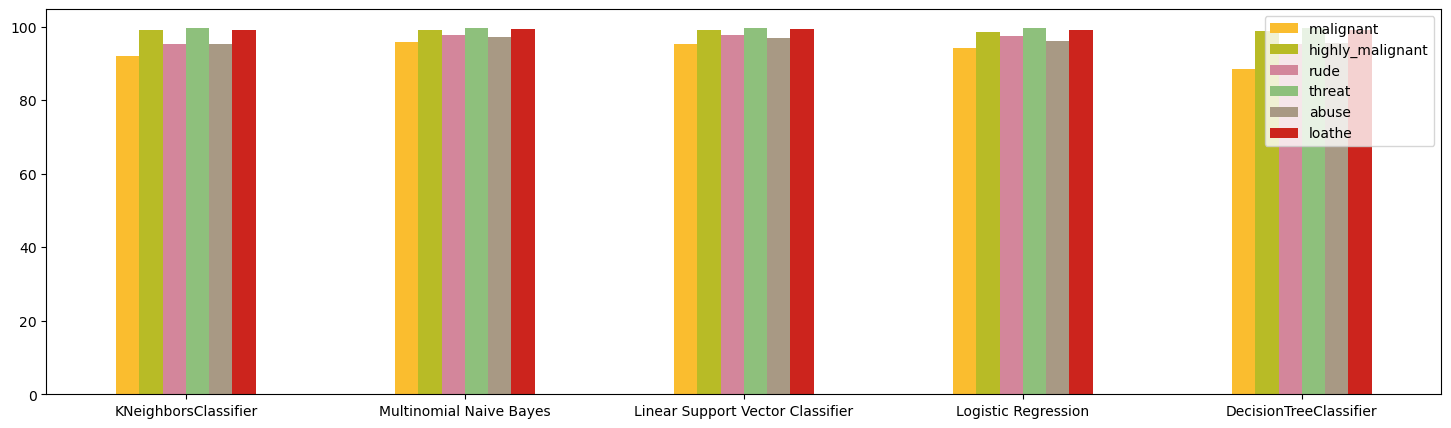

In [46]:
fig = accuracy_df.plot.bar(figsize=(18, 5),
                           color=['#fabd2f','#b8bb26','#d3869b','#8ec07c','#a89984','#cc241d'])
plt.xticks(np.arange(5),('KNeighborsClassifier','Multinomial Naive Bayes','Linear Support Vector Classifier',
                         'Logistic Regression', 'DecisionTreeClassifier'), rotation=0)
plt.legend(y_labels)
plt.show()

In [47]:
models = ['KNeighborsClassifier','Multinomial Naive Bayes','Linear Support Vector Classifier',
                         'Logistic Regression', 'DecisionTreeClassifier']
for i in range(5):
  print(models[i], "- Aggregate Accuracy -", np.mean(accuracy_df.iloc[i,:]))

KNeighborsClassifier - Aggregate Accuracy - 96.78333333333332
Multinomial Naive Bayes - Aggregate Accuracy - 98.12666666666667
Linear Support Vector Classifier - Aggregate Accuracy - 98.0
Logistic Regression - Aggregate Accuracy - 97.48166666666667
DecisionTreeClassifier - Aggregate Accuracy - 96.17833333333334


In [48]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
mnb = MultinomialNB()

predictions = {y_labels[0]:[], y_labels[1]:[], y_labels[2]:[], y_labels[3]:[], y_labels[4]:[], y_labels[5]:[]}
f1score, prediction_accuracy = [], []

for i in y_labels:
  mnb.fit(x_train, train[i])
  y_pred = mnb.predict(x_test)
  predictions[i].append(y_pred)
  print(i)
  
  pred_acc = accuracy_score(test[i], y_pred)
  prediction_accuracy.append(pred_acc)
  print("Accuracy :: {0}%".format(round(pred_acc*100,2)))

  f1s = f1_score(test[i], y_pred)
  f1score.append(f1s)
  print("F1 Score :: {0}%".format(round(f1s*100,2)))
  print(confusion_matrix(test[i], y_pred), '\n')

malignant
Accuracy :: 92.14%
F1 Score :: 32.45%
[[43205     2]
 [ 3761   904]] 

highly_malignant
Accuracy :: 98.96%
F1 Score :: 0.0%
[[47376     0]
 [  496     0]] 

rude
Accuracy :: 95.36%
F1 Score :: 23.63%
[[45305     5]
 [ 2218   344]] 

threat
Accuracy :: 99.73%
F1 Score :: 0.0%
[[47743     0]
 [  129     0]] 

abuse
Accuracy :: 95.35%
F1 Score :: 11.59%
[[45498     6]
 [ 2222   146]] 

loathe
Accuracy :: 99.16%
F1 Score :: 0.0%
[[47471     0]
 [  401     0]] 



### Applying the model on the test data

In [65]:
df_test = pd.read_csv("train.csv") # importing test data
clean_comment_text(df_test, 'comment_text') # to clean the comments

In [68]:
# creating a column that checks for highly malicious comments
df_test['extreme'] = np.where((df_test['malignant'] & df_test['highly_malignant'] == 1) | 
                                 (df_test['malignant'] & df_test['rude'] == 1) | 
                                 (df_test['malignant'] & df_test['threat'] == 1) | 
                                 (df_test['malignant'] & df_test['abuse'] == 1) | 
                                 (df_test['malignant'] & df_test['loathe'] == 1) | 
                                 (df_test['highly_malignant'] & df_test['rude'] == 1) | 
                                 (df_test['highly_malignant'] & df_test['threat'] == 1) | 
                                 (df_test['highly_malignant'] & df_test['abuse'] == 1) | 
                                 (df_test['highly_malignant'] & df_test['loathe'] == 1) | 
                                 (df_test['rude'] & df_test['threat'] == 1) | 
                                 (df_test['rude'] & df_test['abuse'] == 1) | 
                                 (df_test['rude'] & df_test['loathe'] == 1) | 
                                 (df_test['threat'] & df_test['loathe'] == 1) | 
                                 (df_test['threat'] & df_test['abuse'] == 1) | 
                                 (df_test['abuse'] & df_test['loathe'] == 1), 1, 0)

In [70]:
x_train = df_test['comment_text']
x_train = tf.fit_transform(cv.fit_transform(x_train))

y_train = df_test.drop(columns=['comment_text', 'id','extreme'])

pred = df_test['comment_text']
pred = tf.transform(cv.transform(pred))

In [71]:
predictions = []
for j, i in enumerate(y_labels):
  sv.fit(x_train, y_train[i]) # fitting the model
  y_pred = sv.predict(pred).tolist() # np array of predictions to list
  predictions.append(y_pred)
  print(i, '→ Predicted: ', round((j+1)/6*100,2), '% Complete')

malignant → Predicted:  16.67 % Complete
highly_malignant → Predicted:  33.33 % Complete
rude → Predicted:  50.0 % Complete
threat → Predicted:  66.67 % Complete
abuse → Predicted:  83.33 % Complete
loathe → Predicted:  100.0 % Complete


In [72]:
test_result = pd.DataFrame({'id':df_test['id'], 'comment_text':df_test['comment_text'], 'malignant':predictions[0], 'highly_malignant':predictions[1], 'rude':predictions[2], 'threat':predictions[3], 'abuse':predictions[4], 'loathe':predictions[5]})
test_result

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0
159567,ffea4adeee384e90,ashamed horrible thing put talk page number nu...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres actual article prostitution...,0,0,0,0,0,0
159569,fff125370e4aaaf3,looks like actually put speedy first version d...,0,0,0,0,0,0


### Saving the file

In [74]:
# Export to csv
test_result.to_csv('submission.csv',index=False)